<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    79.588065  38.949982  53.129071  0.034191  181.701308   
      1.0    91.179161  58.633329  54.040855 -0.125994  213.727350   
      2.0    60.512387  55.825976  44.905044 -0.075108  171.168299   
      3.0    31.199595  37.098985  31.525468  0.100513  109.924561   
      4.0    46.691182  66.529652  82.000203  0.030153  205.251190   
...                ...        ...        ...       ...         ...   
999.0 55.0   68.176563  89.065060  68.166067 -0.154349  235.253341   
      56.0   31.673184  95.517076  28.812557 -0.023899  165.978918   
      57.0   39.545140  54.884185  26.216332 -0.017762  130.627896   
      58.0   78.440623  64.397278  30.180106  0.035609  183.053617   
      59.0   60.003187  99.859336  48.698863 -0.070347  218.491039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.647358  0.053951  
      1.0    213.824572 -0.097222  
      2.0    171.231954 -0.063655  
      3.0    109.829631  0.094930  
      4.0    205.226103  0.025087  
...                 ...       ...  
999.0 55.0   235.407610 -0.154268  
      56.0   165.980664 -0.001746  
      57.0   130.645161 -0.017265  
      58.0   183.003005  0.050612  
      59.0   218.542671 -0.051632  

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    79.588065  38.949982  53.129071  0.034191  181.701308   
      1.0    91.179161  58.633329  54.040855 -0.125994  213.727350   
      2.0    60.512387  55.825976  44.905044 -0.075108  171.168299   
      3.0    31.199595  37.098985  31.525468  0.100513  109.924561   
      4.0    46.691182  66.529652  82.000203  0.030153  205.251190   
...                ...        ...        ...       ...         ...   
999.0 55.0   68.176563  89.065060  68.166067 -0.154349  235.253341   
      56.0   31.673184  95.517076  28.812557 -0.023899  165.978918   
      57.0   39.545140  54.884185  26.216332 -0.017762  130.627896   
      58.0   78.440623  64.397278  30.180106  0.035609  183.053617   
      59.0   60.003187  99.859336  48.698863 -0.070347  218.491039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.647358  0.053951  
      1.0    213.824572 -0.097222  
      2.0    171.231954 -0.063655  
      3.0    109.829631  0.094930  
      4.0    205.226103  0.025087  
...                 ...       ...  
999.0 55.0   235.407610 -0.154268  
      56.0   165.980664 -0.001746  
      57.0   130.645161 -0.017265  
      58.0   183.003005  0.050612  
      59.0   218.542671 -0.051632  

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,79.588065,38.949982,53.129071,0.034191,181.701308,181.647358,0.053951
1,0.0,1.0,91.179161,58.633329,54.040855,-0.125994,213.727350,213.824572,-0.097222
2,0.0,2.0,60.512387,55.825976,44.905044,-0.075108,171.168299,171.231954,-0.063655
3,0.0,3.0,31.199595,37.098985,31.525468,0.100513,109.924561,109.829631,0.094930
4,0.0,4.0,46.691182,66.529652,82.000203,0.030153,205.251190,205.226103,0.025087
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,68.176563,89.065060,68.166067,-0.154349,235.253341,235.407610,-0.154268
59996,999.0,56.0,31.673184,95.517076,28.812557,-0.023899,165.978918,165.980664,-0.001746
59997,999.0,57.0,39.545140,54.884185,26.216332,-0.017762,130.627896,130.645161,-0.017265
59998,999.0,58.0,78.440623,64.397278,30.180106,0.035609,183.053617,183.003005,0.050612


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    79.588065  38.949982  53.129071  0.034191  181.701308   
      1.0    91.179161  58.633329  54.040855 -0.125994  213.727350   
      2.0    60.512387  55.825976  44.905044 -0.075108  171.168299   
      3.0    31.199595  37.098985  31.525468  0.100513  109.924561   
      4.0    46.691182  66.529652  82.000203  0.030153  205.251190   
...                ...        ...        ...       ...         ...   
999.0 55.0   68.176563  89.065060  68.166067 -0.154349  235.253341   
      56.0   31.673184  95.517076  28.812557 -0.023899  165.978918   
      57.0   39.545140  54.884185  26.216332 -0.017762  130.627896   
      58.0   78.440623  64.397278  30.180106  0.035609  183.053617   
      59.0   60.003187  99.859336  48.698863 -0.070347  218.491039   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    181.647358  0.053951  
      1.0    213.824572 -0.097222  
      2.0    171.231954 -0.063655  
      3.0    109.829631  0.094930  
      4.0    205.226103  0.025087  
...                 ...       ...  
999.0 55.0   235.407610 -0.154268  
      56.0   165.980664 -0.001746  
      57.0   130.645161 -0.017265  
      58.0   183.003005  0.050612  
      59.0   218.542671 -0.051632  

[60000 rows x 7 columns]

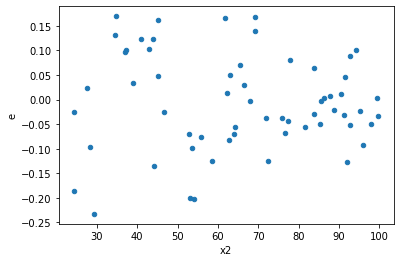

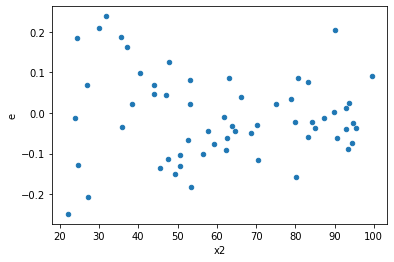

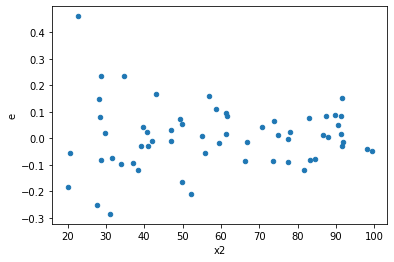

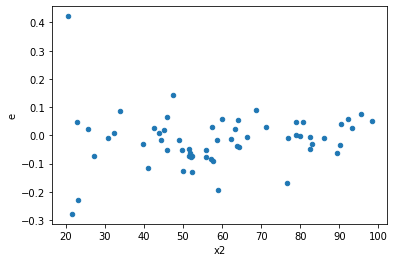

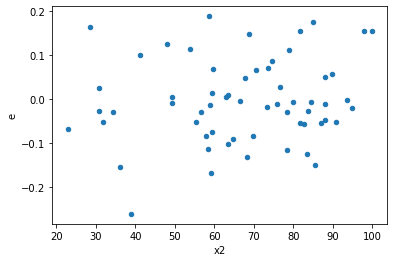

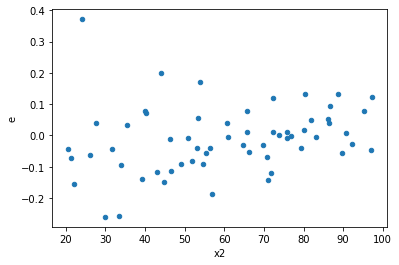

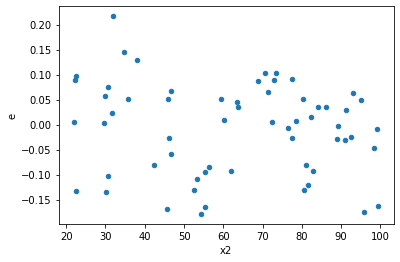

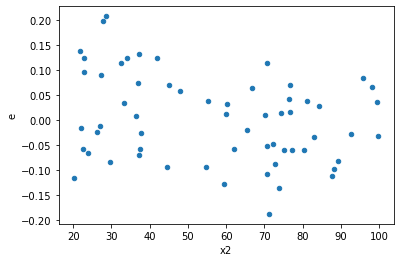

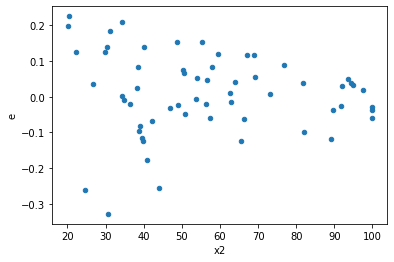

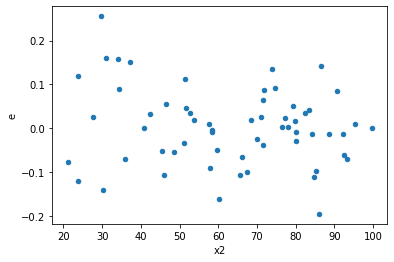

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
7.0,21.0,21.0,0.15680250331115433,0.16012504504512534,0.00746678587195973,0.007625002145005969,1.0211893411381185,0.9621347520479091,0.5189326239760454,0.48106737602395455,Reject001=1 : Homoscedasticity
27.0,21.0,21.0,0.11648529542901931,0.23831634955073336,0.0055469188299533,0.01134839759765397,2.0458921331916287,0.10867832765709662,0.9456608361714517,0.05433916382854831,Reject001=1 : Homoscedasticity
35.0,21.0,21.0,0.2793926024661332,0.282690075458593,0.013304409641244437,0.013461432164694904,1.0118022916976104,0.978805889172353,0.5105970554138235,0.4894029445861765,Reject001=1 : Homoscedasticity
36.0,21.0,21.0,0.22686973871262472,0.26274540151706305,0.010803320891077368,0.012511685786526812,1.1581333103657423,0.739695791269013,0.6301521043654935,0.3698478956345065,Reject001=1 : Homoscedasticity
43.0,21.0,21.0,0.15468907512067442,0.19148678207139275,0.00736614643431783,0.009118418193875846,1.237881743891817,0.6292884586427614,0.6853557706786193,0.3146442293213807,Reject001=1 : Homoscedasticity
47.0,21.0,21.0,0.13195937830493396,0.1512377467097044,0.006283779919282569,0.007201797462366877,1.1460932042300296,0.7576079283921864,0.6211960358039068,0.3788039641960932,Reject001=1 : Homoscedasticity
50.0,21.0,21.0,0.14118300399707737,0.24747270468939536,0.006723000190337018,0.011784414509018827,1.752850539251299,0.20671054800221356,0.8966447259988932,0.10335527400110678,Reject001=1 : Homoscedasticity
53.0,21.0,21.0,0.1989056441803328,0.2746344030938633,0.00947169734192061,0.013077828718755393,1.3807270488758625,0.46606715535178234,0.7669664223241088,0.23303357767589117,Reject001=1 : Homoscedasticity
68.0,21.0,21.0,0.2003183767411952,0.22478705155398457,0.009538970321009296,0.010704145312094503,1.122148927177071,0.7941961171866603,0.6029019414066699,0.39709805859333014,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.27490173511980975,0.12831650518352622,0.013090558815229036,0.006110309770644105,0.4667722636512365,0.08816672009859416,Reject001=1 : Homoscedasticity
1.0,21.0,21.0,0.3052793420442527,0.1307636343300912,0.014537111525916796,0.006226839730004342,0.4283409203336659,0.058444389191366776,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.23004544243682884,0.10414266692094598,0.010954544877944231,0.004959174615283142,0.45270476049332675,0.07639632841023249,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,0.4058902953648682,0.055555800919176015,0.019328109303088963,0.0026455143294845723,0.13687393257144784,2.6628834344093123e-05,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,0.21670487086342943,0.12848623208808013,0.010319279564925211,0.006118392004194292,0.5929088329955169,0.23920882425295945,Reject001=1 : Homoscedasticity
5.0,21.0,21.0,0.36512418166069543,0.07571757872500783,0.01738686579336645,0.0036055989869051347,0.2073748673139679,0.00066840124360051,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,0.16516707245275375,0.15344896675093997,0.00786509868822637,0.007307093654806665,0.9290530156659055,0.8676836638918709,Reject001=1 : Homoscedasticity
7.0,21.0,21.0,0.15680250331115433,0.16012504504512534,0.00746678587195973,0.007625002145005969,1.0211893411381185,0.9621347520479091,Reject001=1 : Homoscedasticity
8.0,21.0,21.0,0.2767475634799679,0.06609895767677895,0.013178455403807994,0.00314756941317995,0.23884205824837718,0.0018133690681411154,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      870
Reject001=0 : Heteroscedasticity    130
Name: Result_test, dtype: int64